In [2]:
import pandas as pd
import sklearn
from helpers import *
import matplotlib.pyplot as plt
import sys
sys.path.append("..")
from data.unlabeled.raw import edstats_co as df_c, edstats_da as df_d, edstats_se as df_s
import seaborn as sns

..\data\unlabeled\raw\__init__.py:41: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  aquastat_eah = pd.read_csv(aquastat_eah_path, skipfooter=8)
..\data\unlabeled\raw\__init__.py:42: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  aquastat_wr = pd.read_csv(aquastat_wr_path, skipfooter=8)
..\data\unlabeled\raw\__init__.py:43: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  aquastat_wu = pd.read_csv(aquastat_wu_path, skipfooter=8)


### Remember to extract Edstats_csv.zip to Edstats_csv

In [3]:
df_d.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69'],
      dtype='object')

In [4]:
years = ['2015', '2016', '2017', '2020']
stripped_df_d = df_d[['Country Code','Indicator Code',*years]]
print("Non na values in col 2020:",stripped_df_d['2020'].count())
stripped_df_d

Non na values in col 2020: 51436


,Country Code,Indicator Code,2015,2016,2017,2020
0,ARB,UIS.NERA.2,NaN,NaN,NaN,NaN
1,ARB,UIS.NERA.2.F,NaN,NaN,NaN,NaN
2,ARB,UIS.NERA.2.GPI,NaN,NaN,NaN,NaN
3,ARB,UIS.NERA.2.M,NaN,NaN,NaN,NaN
4,ARB,SE.PRM.TENR,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
886925,ZWE,UIS.LP.AG15T24.M,NaN,NaN,NaN,NaN
886926,ZWE,SE.ADT.1524.LT.ZS,NaN,NaN,NaN,NaN
886927,ZWE,SE.ADT.1524.LT.FE.ZS,NaN,NaN,NaN,NaN
886928,ZWE,SE.ADT.1524.LT.FM.ZS,NaN,NaN,NaN,NaN


### Merge colums to remove null values

In [5]:
for year in years[:-1]:
    fill_missing_with_column(stripped_df_d, '2020',year)
print("Non na values in col 2020:", stripped_df_d['2020'].count())
stripped_df_d

Non na values in col 2020: 132991
c:\Users\joach\code-projects\WaterSecurity\unlabeled_preprocessing\helpers.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[into] = df[into].combine_first(df[fro])
C:\Users\joach\.conda\envs\wsenv\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Country Code,Indicator Code,2020
0,ARB,UIS.NERA.2,NaN
1,ARB,UIS.NERA.2.F,NaN
2,ARB,UIS.NERA.2.GPI,NaN
3,ARB,UIS.NERA.2.M,NaN
4,ARB,SE.PRM.TENR,NaN
...,...,...,...
886925,ZWE,UIS.LP.AG15T24.M,NaN
886926,ZWE,SE.ADT.1524.LT.ZS,NaN
886927,ZWE,SE.ADT.1524.LT.FE.ZS,NaN
886928,ZWE,SE.ADT.1524.LT.FM.ZS,NaN


In [6]:
df_d_withseries = stripped_df_d.merge(df_s, how='left', left_on='Indicator Code', right_on='Series Code')
df_d_withseries.drop(['Indicator Code'], inplace=True, axis=1)

In [7]:
df_d_withseries.columns

Index(['Country Code', '2020', 'Series Code', 'Topic', 'Indicator Name',
       'Short definition', 'Long definition', 'Unit of measure', 'Periodicity',
       'Base Period', 'Other notes', 'Aggregation method',
       'Limitations and exceptions', 'Notes from original source',
       'General comments', 'Source', 'Statistical concept and methodology',
       'Development relevance', 'Related source links', 'Other web links',
       'Related indicators', 'License Type', 'Unnamed: 20'],
      dtype='object')

### Rearange table to indicator on column

In [8]:
countryXindicator = df_d_withseries.pivot_table('2020',['Country Code'],'Indicator Name')
countryXindicator

Indicator Name,"Adjusted net enrolment rate, lower secondary, both sexes (%)","Adjusted net enrolment rate, lower secondary, female (%)","Adjusted net enrolment rate, lower secondary, gender parity index (GPI)","Adjusted net enrolment rate, lower secondary, male (%)","Adjusted net enrolment rate, primary, both sexes (%)","Adjusted net enrolment rate, primary, female (%)","Adjusted net enrolment rate, primary, gender parity index (GPI)","Adjusted net enrolment rate, primary, male (%)","Adjusted net enrolment rate, upper secondary, both sexes (%)","Adjusted net enrolment rate, upper secondary, female (%)",...,"Under-age enrolment ratio in secondary education, female (%)","Under-age enrolment ratio in secondary education, male (%)","Unemployment, female (% of female labor force) (modeled ILO estimate)","Unemployment, male (% of male labor force) (modeled ILO estimate)","Unemployment, total (% of total labor force) (modeled ILO estimate)","Youth illiterate population, 15-24 years, % female","Youth literacy rate, population 15-24 years, both sexes (%)","Youth literacy rate, population 15-24 years, female (%)","Youth literacy rate, population 15-24 years, gender parity index (GPI)","Youth literacy rate, population 15-24 years, male (%)"
Country Code,,,,,,,,,,,,,,,,,,,,,
ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,12.700000,7.7,8.600000,NaN,NaN,NaN,NaN,NaN
AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,6.700000,5.7,6.200000,NaN,NaN,NaN,NaN,NaN
ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,17.299999,17.0,17.100000,NaN,NaN,NaN,NaN,NaN
AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,47.80890,100.00000,100.00000,1.00000,100.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YEM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,32.700001,11.1,16.700001,NaN,NaN,NaN,NaN,NaN
ZAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,27.700001,23.1,25.200001,34.34808,98.95578,99.22904,1.00552,98.68459


### Find columns that contain "number", "Projection" or "$"

In [9]:
projection_col = [colname for colname in countryXindicator.columns if "Projection" in colname]
number = [colname for colname in countryXindicator.columns if "number" in colname]
dollar = [colname for colname in countryXindicator.columns if "$" in colname]

### And remove them

In [10]:
countryXindicator.drop(projection_col + number+ dollar,inplace=True,axis=1)
countryXindicator.shape

(241, 1502)

### Remove population data

In [11]:
countryXindicator.drop(['Population, total'], axis=1, inplace=True)

### See how much of the data is missing and drop columns where more than 50% of the values are null

In [12]:
print_missing_percentages(countryXindicator)

Max, min and mean number of missing values for the columns
Max: 99.5850622406639 %
Min: 3.7344398340248963 %
Mean: 81.31204369977415 %


(3.7344398340248963, 99.5850622406639)

In [13]:
dropColumnHalf(countryXindicator)

In [14]:
print_missing_percentages(countryXindicator)

Max, min and mean number of missing values for the columns
Max: 49.79253112033195 %
Min: 3.7344398340248963 %
Mean: 26.60212079299217 %


(3.7344398340248963, 49.79253112033195)

In [15]:
countryXindicator.shape

(241, 243)

In [16]:
 countryXindicator

Indicator Name,"Adjusted net enrolment rate, primary, both sexes (%)","Age population, age 0, female, UNESCO","Age population, age 0, total, UNESCO","Age population, age 01, female, UNESCO","Age population, age 01, total, UNESCO","Age population, age 02, female, UNESCO","Age population, age 02, total, UNESCO","Age population, age 03, female, UNESCO","Age population, age 03, total, UNESCO","Age population, age 04, female, UNESCO",...,"Prevalence of HIV, total (% of population ages 15-49)","Primary completion rate, both sexes (%)","Primary completion rate, female (%)","Primary completion rate, male (%)",Theoretical duration of primary education (years),Theoretical duration of secondary education (years),Theoretical duration of upper secondary education (years),"Unemployment, female (% of female labor force) (modeled ILO estimate)","Unemployment, male (% of male labor force) (modeled ILO estimate)","Unemployment, total (% of total labor force) (modeled ILO estimate)"
Country Code,,,,,,,,,,,,,,,,,,,,,
ABW,NaN,542.0,1112.0,572.0,1170.0,600.0,1224.0,623.0,1269.0,643.0,...,NaN,NaN,NaN,NaN,6.0,5.0,3.0,NaN,NaN,NaN
AFG,NaN,682677.0,1403010.0,650389.0,1338500.0,620880.0,1279403.0,593957.0,1225345.0,569425.0,...,0.1,NaN,NaN,NaN,6.0,6.0,3.0,12.700000,7.7,8.600000
AGO,NaN,414919.0,832093.0,396537.0,793950.0,379705.0,759164.0,364295.0,727455.0,350180.0,...,1.9,NaN,NaN,NaN,6.0,6.0,3.0,6.700000,5.7,6.200000
ALB,NaN,23697.0,49105.0,24026.0,49709.0,24243.0,50104.0,24360.0,50315.0,24397.0,...,0.1,106.367561,104.699371,107.900124,5.0,7.0,3.0,17.299999,17.0,17.100000
AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,6.0,6.0,2.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YEM,NaN,458859.0,936053.0,452601.0,923017.0,444988.0,907252.0,436223.0,889171.0,426514.0,...,0.1,NaN,NaN,NaN,6.0,6.0,3.0,32.700001,11.1,16.700001
ZAF,NaN,484535.0,980663.0,486901.0,985215.0,489516.0,990194.0,492299.0,995445.0,495165.0,...,18.9,NaN,NaN,NaN,7.0,5.0,3.0,27.700001,23.1,25.200001


### Split dataset into a dataframe containing year-data and a dataframe for the float-precentages-data
This i done for better imputation results

In [17]:
int_cols = find_all_integer_columns(countryXindicator)

In [18]:
countryXindicator_float = countryXindicator.drop(int_cols, axis=1)
print(countryXindicator_float.index.to_list())

['ABW', 'AFG', 'AGO', 'ALB', 'AND', 'ARB', 'ARE', 'ARG', 'ARM', 'ASM', 'ATG', 'AUS', 'AUT', 'AZE', 'BDI', 'BEL', 'BEN', 'BFA', 'BGD', 'BGR', 'BHR', 'BHS', 'BIH', 'BLR', 'BLZ', 'BMU', 'BOL', 'BRA', 'BRB', 'BRN', 'BTN', 'BWA', 'CAF', 'CAN', 'CHE', 'CHI', 'CHL', 'CHN', 'CIV', 'CMR', 'COD', 'COG', 'COL', 'COM', 'CPV', 'CRI', 'CUB', 'CUW', 'CYM', 'CYP', 'CZE', 'DEU', 'DJI', 'DMA', 'DNK', 'DOM', 'DZA', 'EAP', 'EAS', 'ECA', 'ECS', 'ECU', 'EGY', 'EMU', 'ERI', 'ESP', 'EST', 'ETH', 'EUU', 'FIN', 'FJI', 'FRA', 'FRO', 'FSM', 'GAB', 'GBR', 'GEO', 'GHA', 'GIB', 'GIN', 'GMB', 'GNB', 'GNQ', 'GRC', 'GRD', 'GRL', 'GTM', 'GUM', 'GUY', 'HIC', 'HKG', 'HND', 'HPC', 'HRV', 'HTI', 'HUN', 'IDN', 'IMN', 'IND', 'IRL', 'IRN', 'IRQ', 'ISL', 'ISR', 'ITA', 'JAM', 'JOR', 'JPN', 'KAZ', 'KEN', 'KGZ', 'KHM', 'KIR', 'KNA', 'KOR', 'KWT', 'LAC', 'LAO', 'LBN', 'LBR', 'LBY', 'LCA', 'LCN', 'LDC', 'LIC', 'LIE', 'LKA', 'LMC', 'LMY', 'LSO', 'LTU', 'LUX', 'LVA', 'MAC', 'MAR', 'MCO', 'MDA', 'MDG', 'MDV', 'MEA', 'MEX', 'MHL', 'MIC'

In [19]:
countryXindicator_year = countryXindicator[int_cols]
countryXindicator_year

Indicator Name,"Age population, age 0, female, UNESCO","Age population, age 0, total, UNESCO","Age population, age 01, female, UNESCO","Age population, age 01, total, UNESCO","Age population, age 02, female, UNESCO","Age population, age 02, total, UNESCO","Age population, age 03, female, UNESCO","Age population, age 03, total, UNESCO","Age population, age 04, female, UNESCO","Age population, age 04, total, UNESCO",...,"Population, ages 7-13, male","Population, ages 7-13, total","Population, ages 7-9, female","Population, ages 7-9, male","Population, ages 7-9, total","Population, female","Population, male",Theoretical duration of primary education (years),Theoretical duration of secondary education (years),Theoretical duration of upper secondary education (years)
Country Code,,,,,,,,,,,,,,,,,,,,,
ABW,542.0,1112.0,572.0,1170.0,600.0,1224.0,623.0,1269.0,643.0,1310.0,...,5152.0,10124.0,2095.0,2169.0,4264.0,54743.0,49598.0,6.0,5.0,3.0
AFG,682677.0,1403010.0,650389.0,1338500.0,620880.0,1279403.0,593957.0,1225345.0,569425.0,1175957.0,...,3481981.0,6728457.0,1475542.0,1580498.0,3056040.0,16346869.0,17389625.0,6.0,6.0,3.0
AGO,414919.0,832093.0,396537.0,793950.0,379705.0,759164.0,364295.0,727455.0,350180.0,698548.0,...,1988558.0,3995534.0,913109.0,904577.0,1817686.0,14205741.0,13653564.0,6.0,6.0,3.0
ALB,23697.0,49105.0,24026.0,49709.0,24243.0,50104.0,24360.0,50315.0,24397.0,50378.0,...,179160.0,346732.0,72246.0,77107.0,149353.0,1426369.0,1454334.0,5.0,7.0,3.0
AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,6.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YEM,458859.0,936053.0,452601.0,923017.0,444988.0,907252.0,436223.0,889171.0,426514.0,869195.0,...,2614331.0,5137180.0,1147011.0,1189006.0,2336017.0,13315678.0,13600529.0,6.0,6.0,3.0
ZAF,484535.0,980663.0,486901.0,985215.0,489516.0,990194.0,492299.0,995445.0,495165.0,1000810.0,...,3615273.0,7175459.0,1516934.0,1543083.0,3060017.0,27999778.0,27012199.0,7.0,5.0,3.0


In [20]:
countryXindicator_year = countryXindicator_year[[colname for colname in countryXindicator_year.columns if "years" in colname]]
countryXindicator_year

Indicator Name,Duration of compulsory education (years),Official entrance age to lower secondary education (years),Official entrance age to primary education (years),Theoretical duration of primary education (years),Theoretical duration of secondary education (years),Theoretical duration of upper secondary education (years)
Country Code,,,,,,
ABW,13.0,12.0,6.0,6.0,5.0,3.0
AFG,9.0,13.0,7.0,6.0,6.0,3.0
AGO,6.0,12.0,6.0,6.0,6.0,3.0
ALB,9.0,11.0,6.0,5.0,7.0,3.0
AND,10.0,12.0,6.0,6.0,6.0,2.0
...,...,...,...,...,...,...
XKX,NaN,NaN,NaN,NaN,NaN,NaN
YEM,9.0,12.0,6.0,6.0,6.0,3.0
ZAF,9.0,14.0,7.0,7.0,5.0,3.0


### Impute both dataframes

In [21]:
imputed_countryXindicator_float = impute_df(countryXindicator_float, max_iter=100, verbose=2)

veImputer] Change: 2.532294563247444, scaled tolerance: 0.19410198974609402 
[IterativeImputer] Ending imputation round 19/100, elapsed time 4.17
[IterativeImputer] Change: 2.2119869217502828, scaled tolerance: 0.19410198974609402 
[IterativeImputer] Ending imputation round 20/100, elapsed time 4.38
[IterativeImputer] Change: 1.9202443611257713, scaled tolerance: 0.19410198974609402 
[IterativeImputer] Ending imputation round 21/100, elapsed time 4.59
[IterativeImputer] Change: 1.6606990496546086, scaled tolerance: 0.19410198974609402 
[IterativeImputer] Ending imputation round 22/100, elapsed time 4.82
[IterativeImputer] Change: 1.6559282826221846, scaled tolerance: 0.19410198974609402 
[IterativeImputer] Ending imputation round 23/100, elapsed time 5.04
[IterativeImputer] Change: 1.6520065848505072, scaled tolerance: 0.19410198974609402 
[IterativeImputer] Ending imputation round 24/100, elapsed time 5.26
[IterativeImputer] Change: 1.648782063252183, scaled tolerance: 0.1941019897460

In [22]:
imputed_countryXindicator_year = impute_df(countryXindicator_year, max_iter=100, verbose=2)

[IterativeImputer] Completing matrix with shape (241, 6)
[IterativeImputer] Ending imputation round 1/100, elapsed time 0.01
[IterativeImputer] Change: 1.6443802657682207, scaled tolerance: 0.015 
[IterativeImputer] Ending imputation round 2/100, elapsed time 0.02
[IterativeImputer] Change: 0.0830316620808409, scaled tolerance: 0.015 
[IterativeImputer] Ending imputation round 3/100, elapsed time 0.04
[IterativeImputer] Change: 0.0289166641679115, scaled tolerance: 0.015 
[IterativeImputer] Ending imputation round 4/100, elapsed time 0.05
[IterativeImputer] Change: 0.009636184792338298, scaled tolerance: 0.015 
[IterativeImputer] Early stopping criterion reached.
[IterativeImputer] Completing matrix with shape (241, 6)
[IterativeImputer] Ending imputation round 1/4, elapsed time 0.00
[IterativeImputer] Ending imputation round 2/4, elapsed time 0.00
[IterativeImputer] Ending imputation round 3/4, elapsed time 0.00
[IterativeImputer] Ending imputation round 4/4, elapsed time 0.01


### Convert years float to int

In [23]:
imputed_countryXindicator_year = imputed_countryXindicator_year.round(0).astype(int)

### Comparison correlation plot float-precentages-data
Before Imputation

<AxesSubplot:xlabel='Indicator Name', ylabel='Indicator Name'>

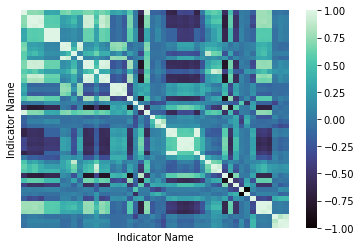

In [24]:
corr_calc = countryXindicator_float.corr()
sns.heatmap(corr_calc, vmin=-1, vmax=1, center=0, xticklabels=False, yticklabels=False, cmap='mako')

After imputation

<AxesSubplot:xlabel='Indicator Name', ylabel='Indicator Name'>

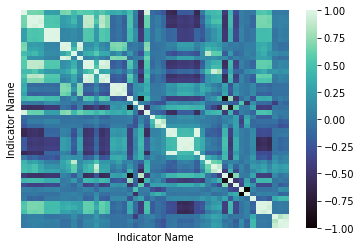

In [25]:
corr_calc = imputed_countryXindicator_float.corr()
sns.heatmap(corr_calc, vmin=-1, vmax=1, center=0, xticklabels=False, yticklabels=False, cmap='mako')

### Comparison correlation plot yeardata
Before imputation

<AxesSubplot:xlabel='Indicator Name', ylabel='Indicator Name'>

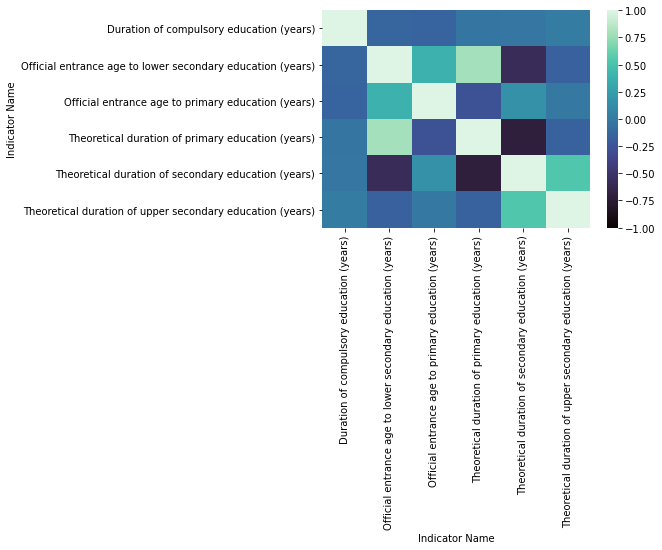

In [26]:
corr_calc = countryXindicator_year.corr()
sns.heatmap(corr_calc, vmin=-1, vmax=1, center=0, cmap='mako')

After imputation

<AxesSubplot:xlabel='Indicator Name', ylabel='Indicator Name'>

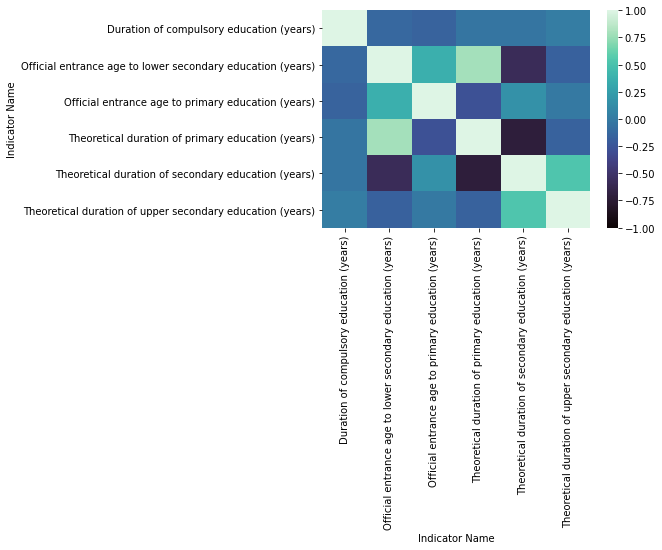

In [27]:
corr_calc = imputed_countryXindicator_year.corr()
sns.heatmap(corr_calc, vmin=-1, vmax=1, center=0, cmap='mako')

### Merge imputed dataframes

In [28]:
imputed_data = imputed_countryXindicator_year.merge(imputed_countryXindicator_float, how='inner', on="Country Code")
imputed_data

Indicator Name,Duration of compulsory education (years),Official entrance age to lower secondary education (years),Official entrance age to primary education (years),Theoretical duration of primary education (years),Theoretical duration of secondary education (years),Theoretical duration of upper secondary education (years),"Adjusted net enrolment rate, primary, both sexes (%)","Gross enrolment ratio, lower secondary, both sexes (%)","Gross enrolment ratio, lower secondary, female (%)","Gross enrolment ratio, lower secondary, male (%)",...,Population growth (annual %),"Population, female (% of total)","Population, male (% of total)","Prevalence of HIV, total (% of population ages 15-49)","Primary completion rate, both sexes (%)","Primary completion rate, female (%)","Primary completion rate, male (%)","Unemployment, female (% of female labor force) (modeled ILO estimate)","Unemployment, male (% of male labor force) (modeled ILO estimate)","Unemployment, total (% of total labor force) (modeled ILO estimate)"
Country Code,,,,,,,,,,,,,,,,,,,,,
ABW,13,12,6,6,5,3,96.636541,91.072857,90.689076,91.406452,...,0.524658,52.465521,47.534479,1.416423,91.125743,90.752535,91.425942,10.349564,8.746525,9.324957
AFG,9,13,7,6,6,3,87.416874,67.447617,49.580441,84.329559,...,2.943234,48.454558,51.545442,0.100000,93.312781,88.498878,97.920359,12.700000,7.700000,8.600000
AGO,6,12,6,6,6,3,87.446703,90.903513,90.527003,91.325392,...,3.428021,50.991010,49.008990,1.900000,92.486172,92.930030,92.143730,6.700000,5.700000,6.200000
ALB,9,11,6,5,7,3,99.516937,101.488373,99.889503,102.980438,...,-0.291206,49.514599,50.485401,0.100000,106.367561,104.699371,107.900124,17.299999,17.000000,17.100000
AND,10,12,6,6,6,2,94.592438,91.281081,91.067359,91.467822,...,-1.537836,49.937398,50.062602,-0.301099,90.510694,89.175083,91.671974,14.798726,11.023894,11.875731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XKX,10,12,6,6,6,3,95.413339,91.084565,90.721799,91.429833,...,-1.103886,49.937397,50.062603,-0.423033,91.464884,91.250304,91.619722,9.662467,9.205525,9.289344
YEM,9,12,6,6,6,3,86.150744,90.902881,90.439904,91.274501,...,2.520254,49.470856,50.529144,0.100000,92.609481,92.837224,92.326815,32.700001,11.100000,16.700001
ZAF,9,14,7,7,5,3,96.505376,91.062603,90.916364,91.240835,...,1.585325,50.897604,49.102396,18.900000,91.111444,91.824840,90.441719,27.700001,23.100000,25.200001


In [29]:
bigtable = imputed_data.merge(df_c, how='left', on="Country Code")
bigtable.columns

Index(['Country Code', 'Duration of compulsory education (years)',
       'Official entrance age to lower secondary education (years)',
       'Official entrance age to primary education (years)',
       'Theoretical duration of primary education (years)',
       'Theoretical duration of secondary education (years)',
       'Theoretical duration of upper secondary education (years)',
       'Adjusted net enrolment rate, primary, both sexes (%)',
       'Gross enrolment ratio, lower secondary, both sexes (%)',
       'Gross enrolment ratio, lower secondary, female (%)',
       'Gross enrolment ratio, lower secondary, male (%)',
       'Gross enrolment ratio, pre-primary, both sexes (%)',
       'Gross enrolment ratio, pre-primary, female (%)',
       'Gross enrolment ratio, pre-primary, male (%)',
       'Gross enrolment ratio, primary, both sexes (%)',
       'Gross enrolment ratio, primary, female (%)',
       'Gross enrolment ratio, primary, gender parity index (GPI)',
       'Gross 

In [33]:
bigtable.set_index('Country Code', inplace=True)

In [34]:
bigtable

,Duration of compulsory education (years),Official entrance age to lower secondary education (years),Official entrance age to primary education (years),Theoretical duration of primary education (years),Theoretical duration of secondary education (years),Theoretical duration of upper secondary education (years),"Adjusted net enrolment rate, primary, both sexes (%)","Gross enrolment ratio, lower secondary, both sexes (%)","Gross enrolment ratio, lower secondary, female (%)","Gross enrolment ratio, lower secondary, male (%)",...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
Country Code,,,,,,,,,,,,,,,,,,,,,
ABW,13,12,6,6,5,3,96.636541,91.072857,90.689076,91.406452,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
AFG,9,13,7,6,6,3,87.416874,67.447617,49.580441,84.329559,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
AGO,6,12,6,6,6,3,87.446703,90.903513,90.527003,91.325392,...,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
ALB,9,11,6,5,7,3,99.516937,101.488373,99.889503,102.980438,...,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
AND,10,12,6,6,6,2,94.592438,91.281081,91.067359,91.467822,...,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XKX,10,12,6,6,6,3,95.413339,91.084565,90.721799,91.429833,...,General Data Dissemination System (GDDS),2011,NaN,"Integrated household survey (IHS), 2011",NaN,NaN,NaN,NaN,NaN,NaN
YEM,9,12,6,6,6,3,86.150744,90.902881,90.439904,91.274501,...,General Data Dissemination System (GDDS),2004,"Demographic and Health Survey (DHS), 2013","Expenditure survey/budget survey (ES/BS), 2005",NaN,NaN,2006.0,2012.0,2005,NaN
ZAF,9,14,7,7,5,3,96.505376,91.062603,90.916364,91.240835,...,Special Data Dissemination Standard (SDDS),2011,"Demographic and Health Survey (DHS), 2003; Wor...","Expenditure survey/budget survey (ES/BS), 2010",NaN,2007,2010.0,2012.0,2000,NaN


In [35]:
bigtable.to_csv("../data/unlabeled/preprocessed/edstats_preprocessed.csv")